In [31]:
import pandas as pd
import plotly.express as px

In [32]:
pwd

'/Users/ethanpanal/Documents/UP/capstone_raw_files/php'

In [33]:
indv_php = pd.read_csv('../indv_php_anon.csv')

In [34]:
#indv_php.head()

In [35]:
indv_php['assmt_dt'] = pd.to_datetime(indv_php['assmt_dt'])

In [36]:
# Clean up the 'biggest_emotions' column (remove unwanted characters, lowercasing)
indv_php['biggest_emotions'] = indv_php['biggest_emotions'].astype(str).apply(
    lambda x: ', '.join([emotion.strip().lower() for emotion in x.split(',')]) if x and x != 'nan' else ''
)

# Handle specific cases of combined emotions (e.g., 'frustrated anger' becomes two emotions: 'frustrated' and 'anger')
indv_php['biggest_emotions'] = indv_php['biggest_emotions'].apply(
    lambda x: x.replace('frustrated anger', 'frustrated, anger')  # Replace 'frustrated anger' with 'frustrated, anger'
)
# Standardize 'boredom' and 'bored' to 'bored'
indv_php['biggest_emotions'] = indv_php['biggest_emotions'].apply(
    lambda x: x.replace('boredom', 'bored')  # Replace 'boredom' with 'bored'
)


# Repeat the 'assmt_dt' column values based on the number of emotions per row
repeated_assmt_dt = indv_php['assmt_dt'].repeat(indv_php['biggest_emotions'].str.split(',').apply(len))

# Explode the 'biggest_emotions' column to get a separate row for each emotion
emotions_exploded = indv_php['biggest_emotions'].str.split(',').explode().reset_index(drop=True)

# Create a new DataFrame with the repeated 'assmt_dt' and exploded 'emotion'
aggregated_data = pd.DataFrame({
    'assmt_dt': repeated_assmt_dt.reset_index(drop=True),
    'emotion': emotions_exploded
})

# Clean up the emotion text (remove unwanted characters like quotes, parentheses, etc.)
aggregated_data['emotion'] = aggregated_data['emotion'].str.replace(r'[\"()]', '', regex=True).str.strip()

# Now, you can count the occurrences of each emotion by 'assmt_dt'
emotion_counts = aggregated_data.groupby('emotion').size().reset_index(name='count')

# Show the result
print(emotion_counts)


                                              emotion  count
0                                                         46
1                                               anger      4
2                                             anxiety     14
3   apathetic; felt lonely doing everything so it ...      1
4                           attended groups virtually      1
5                                 blessed contentment      1
6                                               bored      2
7                                         contentment     16
8                                      felt connected      1
9                                          felt ok to      1
10                                         frustrated      1
11                                              guilt      7
12                                                joy     24
13                          pain physical contentment      1
14                                            sadness      8
15                      

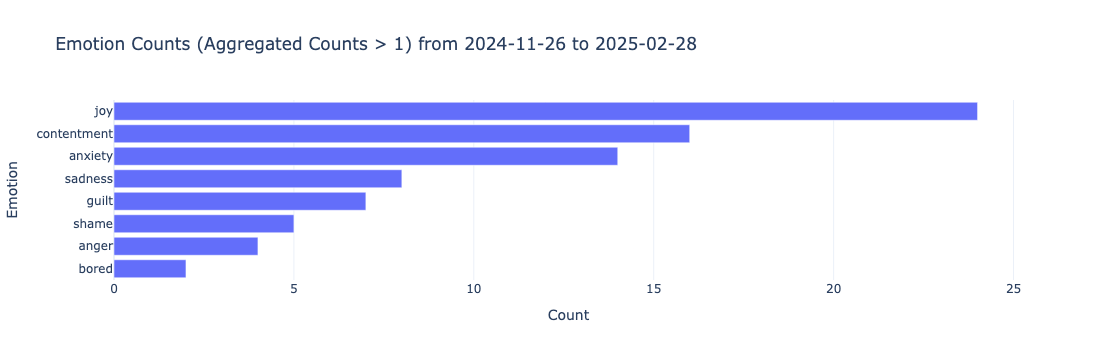

In [37]:
# Filter out None or empty emotions
aggregated_data = aggregated_data[aggregated_data['emotion'].notna() & (aggregated_data['emotion'] != '')]

# Get emotion counts
emotion_counts2 = aggregated_data.groupby('emotion').size().reset_index(name='count')

# Filter emotions that have a count greater than 1
filtered_emotion_counts = emotion_counts2[emotion_counts2['count'] > 1]

# min and max dates
min_date = indv_php['assmt_dt'].min().date()
max_date = indv_php['assmt_dt'].max().date()

# Sort by count in descending order
filtered_emotion_counts = filtered_emotion_counts.sort_values(by='count', ascending=False)

# Create a horizontal bar chart
fig = px.bar(
    filtered_emotion_counts, 
    x='count', 
    y='emotion', 
    orientation='h',  # Horizontal bars
    title=f'Emotion Counts (Aggregated Counts > 1) from {min_date} to {max_date}',
    labels={'count': 'Count', 'emotion': 'Emotion'},
    #color='count',  # Optional: color by count
    #color_continuous_scale='Blues'  # Optional: color scheme
)

# Adjust layout
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Emotion",
    yaxis=dict(categoryorder='total ascending'),  # Sort by count
    template="plotly_white"
)

fig.show()